### Practica 14 Arbol de clasificación sin poda


En cada nodo observamos el valor de umbral en caso de ser un valor numerico, el indice gini el numero de casos que representa, de todos los casos cuantos corresponden a la clase 0 y cuanos a la 1 y el valor de clasificación

Precisión en entrenamiento: 1.00
Precisión en validación: 1.00


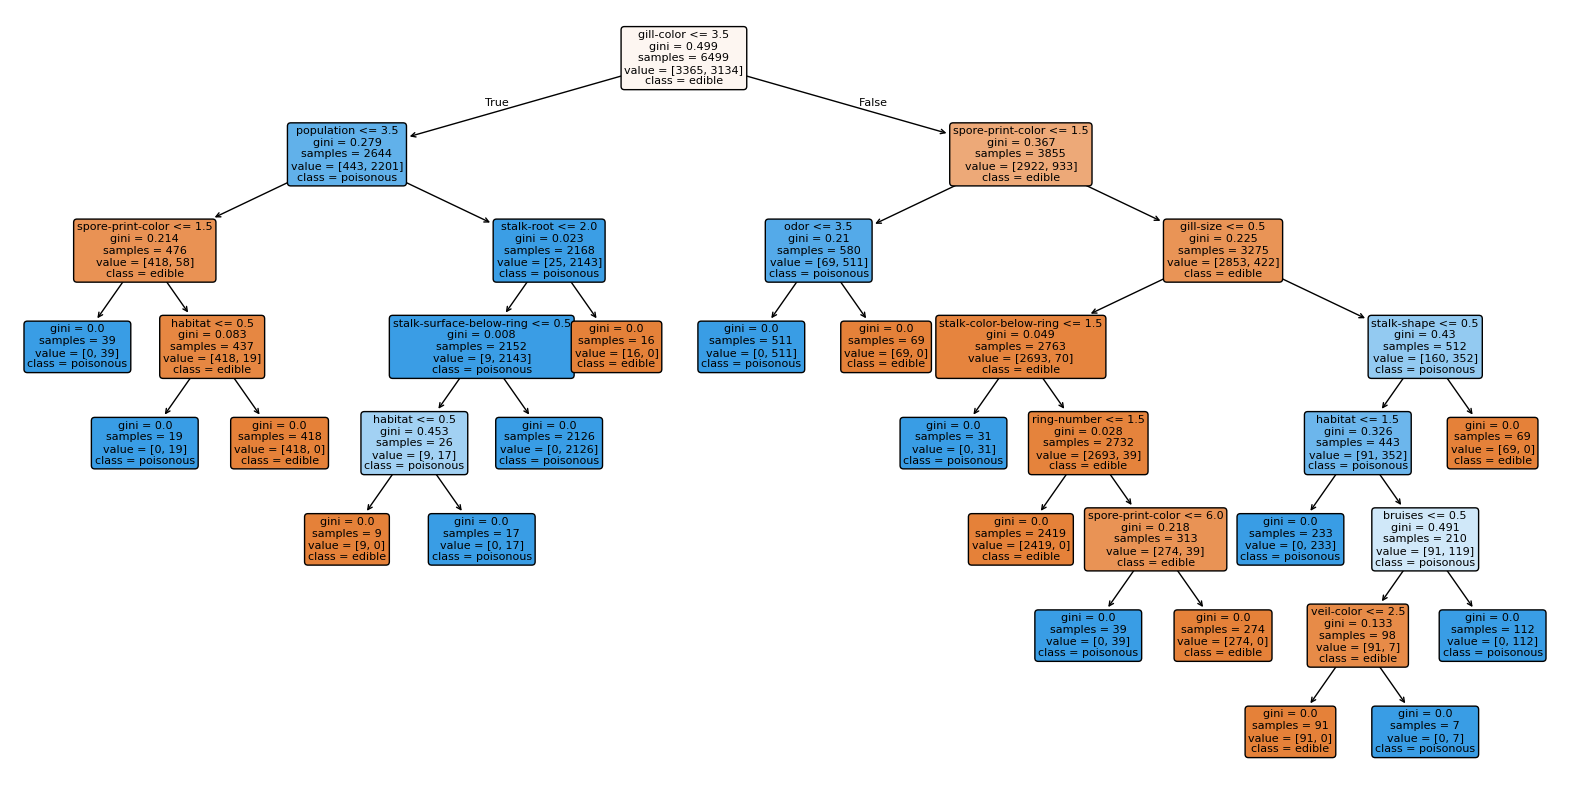

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
data = pd.read_csv(url, names=columns)

# Codificar las variables categóricas a numéricas
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separar en variables predictoras y objetivo
X = data.drop(columns=["class"])
y = data["class"]

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión en entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en validación: {test_accuracy:.2f}")

# Graficar el árbol de decisión
target_names = ["edible", "poisonous"]
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=target_names, filled=True, rounded=True, fontsize=8)
plt.show()
